## Segment Anything Model ([SAM](https://github.com/facebookresearch/segment-anything)) 
- promptable segmentation system with zero-shot generalization to unfamiliar objects and images.
- [github](https://github.com/facebookresearch/segment-anything)
- [segment-anything.com](https://github.com/facebookresearch/segment-anything)

## Training dataset:
- 11 million images
- 1.1 billion masks

***
## Import and install packages

In [1]:
%pip install -qqq git+https://github.com/facebookresearch/segment-anything.git

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from glob import glob

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from PIL import Image
import albumentations as A

import cv2
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.io import read_image
from torchvision import transforms as T
# from torchvision.transforms import v2 as T

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

***
## Create custom Segmentation Dataset

In [3]:
"""Mask Dataset with torchvision transforms"""

class SegmetationDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root = root_dir
        self.transform = transform
        
        self.image_files = sorted(glob(f"{self.root}/Image/*"))
        self.mask_files = sorted(glob(f"{self.root}/Mask/*"))
        self.total_ims = len(self.image_files)
        self.total_gts = len(self.mask_files)

        assert self.total_ims == self.total_gts
        print(f'There are {self.total_ims} images and {self.total_gts} masks in the dataset')

    def __len__(self):
        return min(len(self.image_files), len(self.mask_files))

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        mask_path = self.mask_files[idx]

        # Load images using PIL
        image = Image.open(img_path)
        mask = Image.open(mask_path)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


# Define your custom transforms
custom_transforms = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
])

***
## Create DS & Visu

In [4]:
# Create the dataset
root_folder = '/kaggle/input/flood-area-segmentation'
custom_dataset = SegmetationDataset(root_folder, transform=custom_transforms)

# Example
sample_idx = 1
image, mask = custom_dataset[sample_idx]

There are 290 images and 290 masks in the dataset


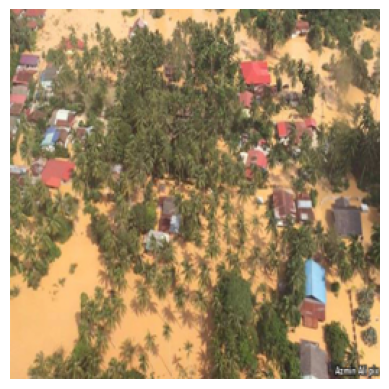

In [8]:
plt.imshow(image.permute(1,2,0).numpy())
plt.axis('off');

***
## Helper functions

In [6]:
# plot img and mask